<a href="https://colab.research.google.com/github/bhawnajoshi1304/MLnow_2.0/blob/main/01_UnivariateLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Univariate Linear Regression

[Link to Download the dataset](https://www.kaggle.com/mohansacharya/graduate-admissions)

**Date Created**: June 12, 2021


**Author**:
[BhawnaJoshi](https://github.com/bhawnajoshi1304) 

### Context
**Graduate Admissions Dataset**:
This dataset is created by **Mohan S Acharya** to estimate chances of graduate admission from an Indian perspective.

### Content
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :
* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )

### Purpose of Notebook
Prediction of Chance of Admit based on CGPA using Univariate Linear Regression.

## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/archive

/content/drive/MyDrive/archive


In [3]:
ls

Admission_Predict.csv         cleanedMathData.csv
Admission_Predict_Ver1.1.csv  univariate_MathData_2.csv


In [4]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [5]:
mathData = pd.read_csv('Admission_Predict.csv', sep=',') #load the csv file as dataframe

In [6]:
mathData.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
mathData = mathData.drop(['Serial No.'], axis=1)
mathData.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
mathData.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
mathData.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67
399,333,117,4,5.0,4.0,9.66,1,0.95


In [10]:
mathData.to_csv('cleanedMathData.csv') #export the mathData as cleanedMathData as csv file

In [11]:
ls

Admission_Predict.csv         cleanedMathData.csv
Admission_Predict_Ver1.1.csv  univariate_MathData_2.csv


## Data Visualization

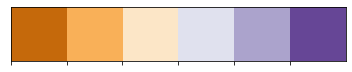

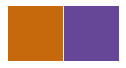

In [12]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [13]:
print(f'''There are {len(mathData.columns)} columns in the dataframe mathData namely,
{mathData.columns}''') #columns in the dataframe

There are 8 columns in the dataframe mathData namely,
Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


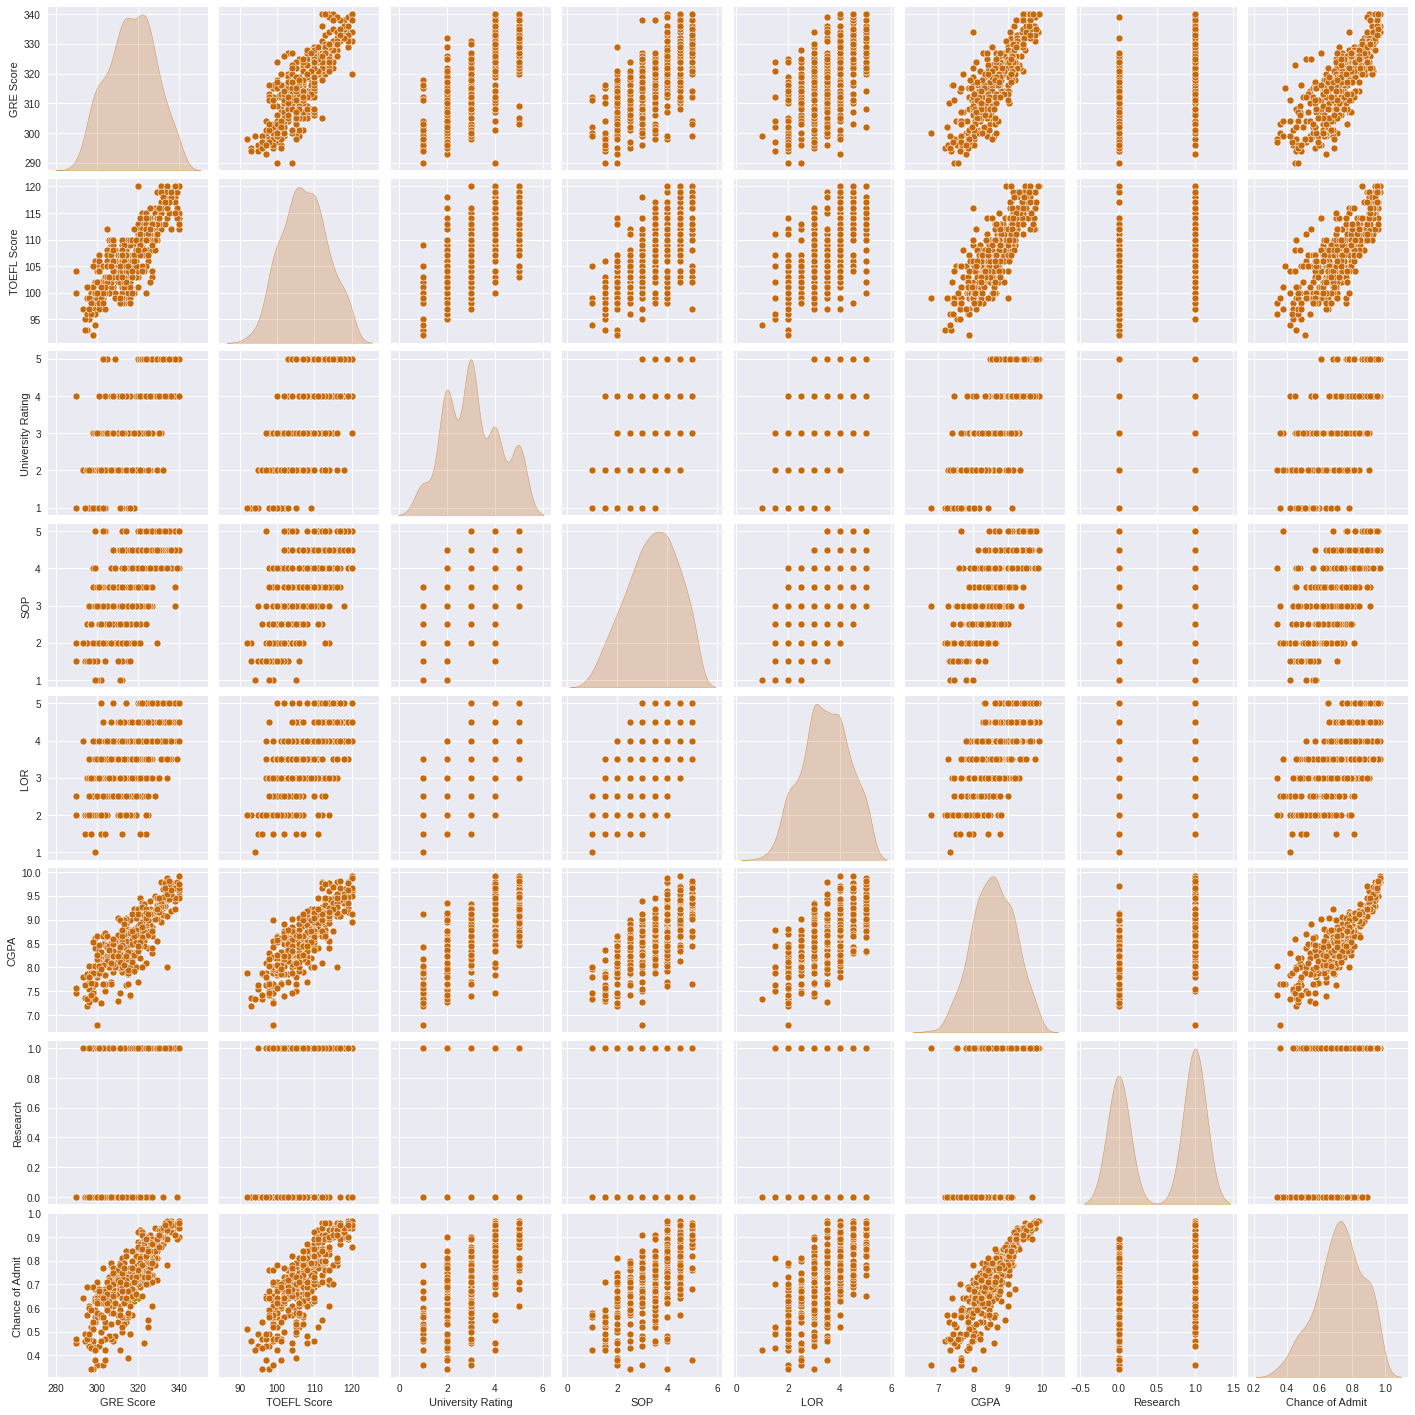

In [14]:
#pairplot for all the values

sns.pairplot(mathData,
             x_vars = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
             y_vars = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
       diag_kind='kde'
             )

We are going to use GRE score to predict Chance to admit for univariate Linear Regression

In [15]:
uniMathData = mathData[['CGPA', 'Chance of Admit ']]
uniMathData.head(5)

,CGPA,Chance of Admit
0,9.65,0.92
1,8.87,0.76
2,8.00,0.72
3,8.67,0.80
4,8.21,0.65


In [16]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [17]:
ls

Admission_Predict.csv         cleanedMathData.csv
Admission_Predict_Ver1.1.csv  univariate_MathData_2.csv


In [18]:
uniMathData.columns

Index(['CGPA', 'Chance of Admit '], dtype='object')

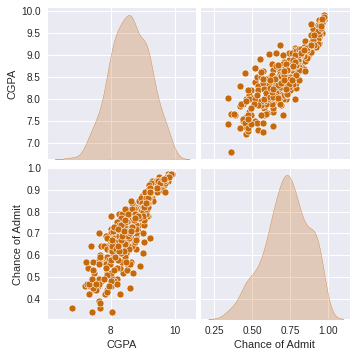

In [19]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['CGPA', 'Chance of Admit '],
             y_vars =  ['CGPA', 'Chance of Admit '],
       diag_kind='kde'
             )

## Data Split

In [20]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     CGPA  Chance of Admit 
132  8.56              0.71
309  8.60              0.70
341  8.76              0.79
196  8.26              0.73
246  8.73              0.72
    CGPA  Chance of Admit 
9    8.6              0.45
25   9.6              0.94
28   7.2              0.46
31   8.3              0.74
32   9.4              0.91


In [21]:

print(trainDataset.shape)
print(testDataset.shape)

(320, 2)
(80, 2)


In [22]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     CGPA  Chance of Admit 
132  8.56              0.71
309  8.60              0.70
341  8.76              0.79
196  8.26              0.73
246  8.73              0.72
    CGPA  Chance of Admit 
9    8.6              0.45
25   9.6              0.94
28   7.2              0.46
31   8.3              0.74
32   9.4              0.91


In [23]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('Chance of Admit ')
testLabels = testFeatures.pop('Chance of Admit ')

print(trainLabels.head())
print(testLabels.head())

132    0.71
309    0.70
341    0.79
196    0.73
246    0.72
Name: Chance of Admit , dtype: float64
9     0.45
25    0.94
28    0.46
31    0.74
32    0.91
Name: Chance of Admit , dtype: float64


In [24]:
print(trainFeatures.head())
print(testFeatures.head())

     CGPA
132  8.56
309  8.60
341  8.76
196  8.26
246  8.73
    CGPA
9    8.6
25   9.6
28   7.2
31   8.3
32   9.4


In [25]:
# univariate -> num(features) = 1
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

In [26]:
model.compile(
    loss = 'mean_absolute_error',
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['mae', 'mse']
)

In [27]:
numEpochs = 200
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/200
10/10 [==============================] - 0s 17ms/step - loss: 4.8536 - mae: 4.8536 - mse: 23.6291 - val_loss: 4.8301 - val_mae: 4.8301 - val_mse: 23.4128
Epoch 2/200
10/10 [==============================] - 0s 3ms/step - loss: 4.7577 - mae: 4.7577 - mse: 22.7035 - val_loss: 4.7336 - val_mae: 4.7336 - val_mse: 22.4867
Epoch 3/200
10/10 [==============================] - 0s 3ms/step - loss: 4.6619 - mae: 4.6619 - mse: 21.7987 - val_loss: 4.6371 - val_mae: 4.6371 - val_mse: 21.5788
Epoch 4/200
10/10 [==============================] - 0s 3ms/step - loss: 4.5659 - mae: 4.5659 - mse: 20.9103 - val_loss: 4.5406 - val_mae: 4.5406 - val_mse: 20.6901
Epoch 5/200
10/10 [==============================] - 0s 3ms/step - loss: 4.4701 - mae: 4.4701 - mse: 20.0417 - val_loss: 4.4441 - val_mae: 4.4441 - val_mse: 19.8195
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 4.3742 - mae: 4.3742 - mse: 19.1907 - val_loss: 4.3476 - val_mae: 4.3476 - val_mse: 18.9680
Epoch 7/2

## Model Outcomes

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


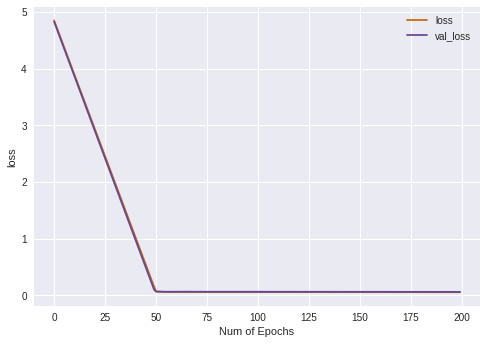

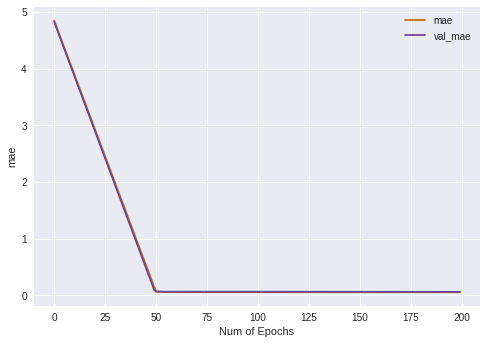

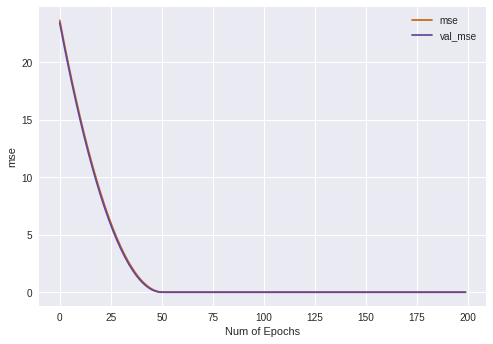

In [29]:
# string --> loss , mae, mse

def plotGraphs(history, string): 
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('Num of Epochs')
  plt.ylabel(string)
  plt.legend([string, f'val_{string}'])
  plt.show()

plotGraphs(history, 'loss')
plotGraphs(history, 'mae')
plotGraphs(history, 'mse')

In [30]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

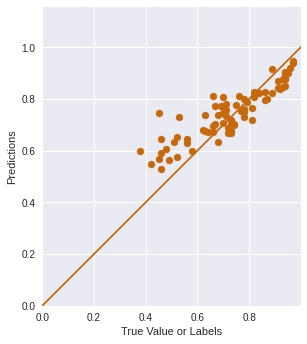

In [31]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.plot([-100, 100], [-100,100])
  plt.show()

predPlot(testLabels, testPreds)

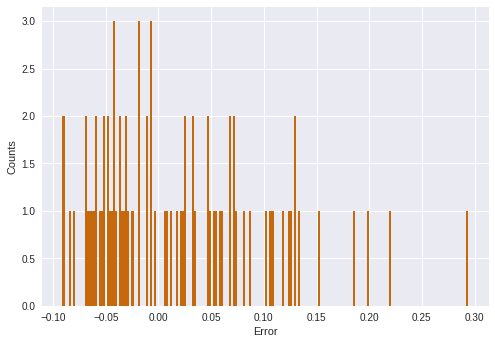

In [32]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)